**Yapay Sinir Ağı Uygulamalarını Ayrıntılı Olarak Sıfırdan Anlamak**

Bir kod bloğunu derinlemesine anlamaya çalışacağız ve aynı kodu farklı bir veri kümesine uygulamaya çalışacağız. Ayrıca, modelimizin nasıl çalıştığını, bir jupyter notebook’un etkileşimli ortamını kullanarak, numpy ve matplotlib gibi temel veri bilimi araçlarını kullanarak adım adım “hata ayıklayarak” görselleştireceğiz.

İlk olarak kütüphaneleri numpy ve matplotlib’i import edilir. 

Rastgele çekirdek parametresini belirli bir sayıya ayarlayalım : 42

Girdimiz : ilk sütunun yararlı bir sütun olduğu, geri kalanının yararlı olabileceği ya da olmayabileceği ve potansiyel bir gürültü olabileceği sahte bir veri kümesini ele alalım.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# set random seed
np.random.seed(42)
# creating the input array
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])
print("Input:\n", X)
# shape of input array
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input: (3, 4)


Ağımızı eğitebilmemiz için girdinin devriğini almalıyız

In [2]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)
 
# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


Çıktı dizimizi oluşturalım ve bunu da aktaralım

In [3]:
# creating the output array
y = np.array([[1], [1], [0]]) 
print("Actual Output:\n", y)

# output in matrix form
y = y.T 
print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


Artık girdi ve çıktı verilerimiz hazır olduğuna göre, sinir ağımızı tanımlayalım.

Sadece üç nöron içeren bir gizli katmana sahip çok basit bir mimari tanımlayacağız bu noktada.

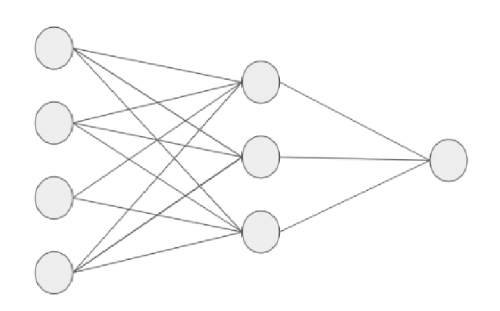

In [4]:
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

Ağdaki her bir nöronun ağırlıklarını başlatacağız. 

Oluşturduğumuz ağırlıklar, başlangıçta rastgele başlattığımız 0 ile 1 arasında değişen değerlere sahiptir.

Basit olması için, hesaplamalara önyargı eklemeyeceğiz.

In [5]:
# initializing weight
# Shape of weights_input_hidden should number of neurons at input 3. layer * number of neurons at hidden layer
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
 
# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
weights_hidden_output = np.random.uniform(
   size=(hiddenLayer_neurons, outputLayer_neurons)
)

Netlik için bu uygun dizilerin şekillerini yazdıralım.

In [7]:
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape
# We are using sigmoid as an activation function so defining the sigmoid function here

((4, 3), (3, 1))

Ağın hem gizli katmanında hem de çıktı katmanında kullanacağımız aktivasyon fonksiyonumuzu sigmoid olarak tanımlıyoruz.

In [8]:
# We are using sigmoid as an activation function so defining the sigmoid function here
# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Önce gizli katman etkinleştirmelerini sonra da çıktı katmanı için ileri geçişimizi uyguluyoruz.

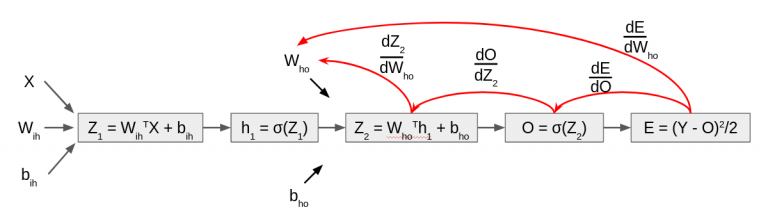

In [9]:
# hidden layer activations
 
hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

In [10]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

Eğitimsiz modelimizin çıktısı:



In [11]:
# output
output

array([[0.68334694, 0.72697078, 0.71257368]])

Girdi verilerinin her bir örneği için bir çıktı elde ederiz.

Hata kaybının karesini kullanarak her örnek için hatayı hesaplayalım.

In [12]:
# calculating error
error = np.square(y - output) / 2
error

array([[0.05013458, 0.03727248, 0.25388062]])

İleri yayılma adımımızı tamamladık ve hatayı aldık.

Şimdi nöronun her bir ağırlığına göre hatayı hesaplamak için geriye doğru bir yayılım yapalım ve sonra bu ağırlıkları basit gradyan inişi kullanarak güncelleyelim.

Öncelikle gizli ve çıktı katmanları arasındaki ağırlıklara göre hatayı hesaplayacağız. 

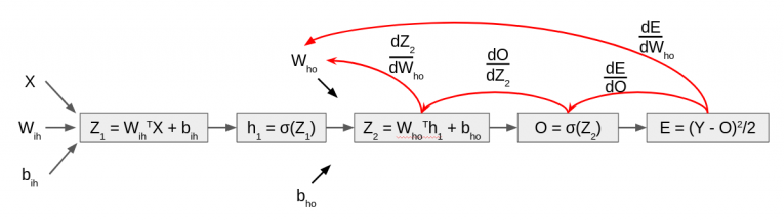

Bunu nerede hesaplayacağımızı, aşağıdaki zincir kuralını kullanan ara adımlarımız olacaktır;

Çıkış w.r.t hata değişim oranı

Çıktı değişim oranı w.r.t Z2

Gizli ve çıktı katmanı arasındaki Z2 ağırlık değişim oranı

İşlemleri gerçekleştirelim…

In [13]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [14]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [15]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

Şimdi ara işlemlerin şekillerine bakalım.

In [16]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape

((1, 3), (1, 3), (3, 3))

In [17]:
# shape of weights of output layer
weights_hidden_output.shape

(3, 1)

Şimdi bu işlemi bu denklemi kullanarak resmi olarak tanımlayabiliriz.

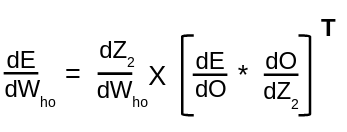


In [18]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(
   outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)

In [19]:
error_wrt_weights_hidden_output.shape

(3, 1)

Çıktıyı beklendiği gibi alıyoruz.

Ayrıca, giriş ve gizli katmanlar arasındaki ağırlıklara göre hatayı hesaplamak için aynı adımları uygulayalım, bunun gibi:

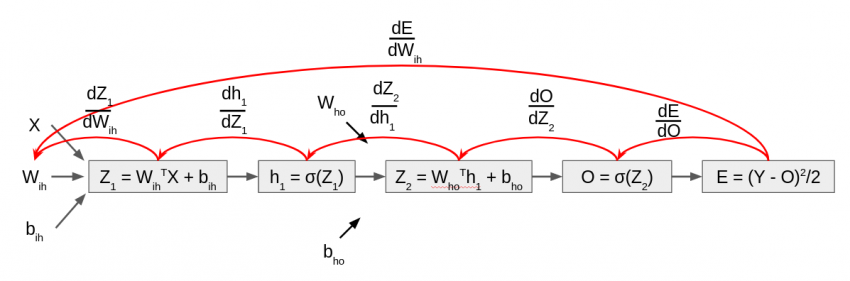

Zincir kuralı ile aşağıdaki ara adımları hesaplayacağız;

Çıkış w.r.t hata değişim oranı

Çıktı değişim oranı w.r.t Z2

Gizli katman aktivasyonlarına göre Z2 değişim oranı

Gizli katman aktivasyonlarının değişim oranı w.r.t Z1

Giriş ve gizli katman arasında Z1 w.r.t ağırlıklarının değişim oranı

In [20]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [21]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [22]:
# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [23]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)

In [24]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

Bu ara dizilerin şekillerini yazdıralım.

In [25]:
# checking the shapes of partial derivatives
print(
   error_wrt_output.shape,
   output_wrt_outputLayer_LinearTransform.shape,
   outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
   hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
   hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)


Ama istediğimiz şey bunun bir dizi şekli:

In [26]:
# shape of weights of hidden layer
weights_input_hidden.shape

(4, 3)

Bu denklemi kullanarak onları birleştireceğiz:

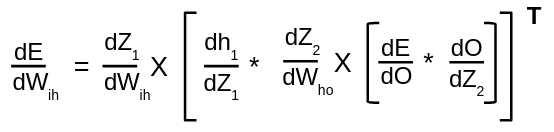



In [27]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
   (
       hiddenLayer_activations_wrt_hiddenLayer_linearTransform
       * np.dot(

       outputLayer_LinearTransform_wrt_hiddenLayer_activations,
      (output_wrt_outputLayer_LinearTransform * error_wrt_output),
    )
).T,
)

Yani istediğimiz çıktı bu. Ortaya çıkan dizinin şeklini hızlıca kontrol edelim:

In [28]:
error_wrt_weights_input_hidden.shape

(4, 3)

Bir sonraki adım, parametreleri güncellemektir. 

Bunun için aşağıdaki gibi gradyan iniş güncelleme fonksiyonunu kullanacağız.

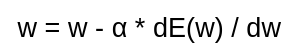


alfa parametremizi, yani öğrenme oranını 0.01 olarak tanımlayın.

In [29]:
# defining the learning rate
lr = 0.01

Ayrıca güncellemeden önce başlangıç ağırlıklarını da yazdırıyoruz.

In [30]:
# initial weights_hidden_output
weights_hidden_output

array([[0.83244264],
       [0.21233911],
       [0.18182497]])

In [31]:
# initial weights_input_hidden
weights_input_hidden

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]])

In [32]:
# updating the weights of output layer
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output

Ağırlıkları güncelleyelim

In [33]:
# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

Ardından, güncellenip güncellenmediğini görmek için ağırlıkları tekrar kontrol ediyoruz.

In [34]:
# updated weights_hidden_output
weights_hidden_output

array([[0.83211079],
       [0.21250681],
       [0.18167831]])

In [35]:
# updated weights_input_hidden
weights_input_hidden

array([[0.37476062, 0.95075719, 0.7320294 ],
       [0.59845481, 0.15594177, 0.15594545],
       [0.05816641, 0.86618978, 0.60112315],
       [0.70795169, 0.02052126, 0.96986892]])

Bu ileri ve geri geçişin yalnızca bir tekrarı (veya iterasyon).

Modelimizin daha iyi performans göstermesi için bunu birden çok kez yapmalıyız

1000 iterasyon boyunca yukarıdaki adımları tekrar uygulayalım…

In [36]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer
 
# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 1000

Her yüzüncü devirde hatayı kontrol etmek için yaptığımız bir hata ayıklama adımı olan böyle bir çıktı alıyoruz:

In [37]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11553
Error at epoch 100 is 0.11082
Error at epoch 200 is 0.10606
Error at epoch 300 is 0.09845
Error at epoch 400 is 0.08483
Error at epoch 500 is 0.06396
Error at epoch 600 is 0.04206
Error at epoch 700 is 0.02641
Error at epoch 800 is 0.01719
Error at epoch 900 is 0.01190


Eğitim devam ederken modelimiz daha iyi ve daha iyi performans gösteriyor gibi görünüyor. 

Eğitim bittikten sonra ağırlıkları kontrol edelim.

In [38]:
# updated w_ih
weights_input_hidden

array([[ 1.25679149,  1.72312858, -0.27336634],
       [-1.07615756, -1.73777864,  1.42316207],
       [ 0.63053865,  0.88090942, -0.03448117],
       [-0.56098781, -0.65506704,  0.61013995]])

In [39]:
# updated w_ho
weights_hidden_output

array([[ 1.45176252],
       [ 2.59109536],
       [-2.18347501]])

Ayrıca eğitimin nasıl geçtiğini görselleştirmek için bir grafik çizdirelim.

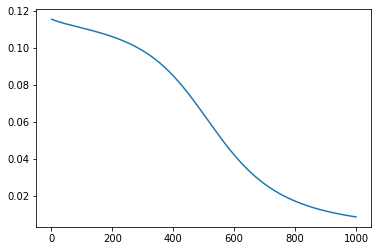

In [40]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

Son olarak, tahminlerin gerçek çıktımıza ne kadar yakın olduğunu kontrol etmek.

In [41]:
# final output from the model
output

array([[0.9155779 , 0.89643511, 0.18608711]])

In [42]:
# actual target
y

array([[1, 1, 0]])

Sonuçlar oldukça yakın...

Ayrıca, yapacağımız bir sonraki şey, modelimizi farklı bir veri kümesi üzerinde eğitmek ve eğitimden sonra bir karar sınırı çizerek performansı görselleştirmek olacaktır.

In [43]:
from sklearn.datasets import make_moons
 
X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

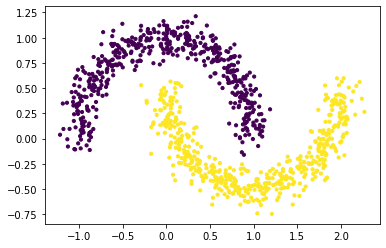

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [45]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

Modelimizin daha hızlı çalışması için girdiyi normalleştireceğiz.

In [51]:
X -= X.min()
X /= X.max()

In [52]:
X.min(), X.max()

(0.0, 1.0)

In [53]:
np.unique(y)

array([0, 1])

In [54]:
X.shape, y.shape

((1000, 2), (1000,))

In [55]:
X = X.T
 
y = y.reshape(1, -1)

In [56]:
X.shape, y.shape

((2, 1000), (1, 1000))

Şimdi ağımızı tanımlayacağız.

Aşağıdaki üç hiperparametreyi güncelleyeceğiz;

Gizli katman nöronları: 10

Öğrenme oranını: 0,1

ve daha fazla iterasyon için eğitelim

In [57]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.23478
Error at epoch 1000 is 0.25000
Error at epoch 2000 is 0.25000
Error at epoch 3000 is 0.25000
Error at epoch 4000 is 0.05129
Error at epoch 5000 is 0.02163
Error at epoch 6000 is 0.01157
Error at epoch 7000 is 0.00745
Error at epoch 8000 is 0.00713
Error at epoch 9000 is 0.00642


Ve bunu çizmek şöyle bir çıktı verir:

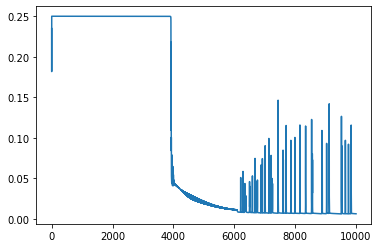

In [58]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [59]:
# final output from the model
output[:, :5]

array([[9.64781360e-01, 9.98834309e-01, 9.95018421e-01, 9.99193286e-01,
        9.11292450e-08]])

Şimdi, tahminleri ve çıktıları manuel olarak kontrol edersek, oldukça yakın görünecekler.

In [60]:
y[:, :5]

array([[1, 1, 1, 1, 0]])

Ardından, karar sınırını çizerek performansı görselleştirelim. 

Aşağıdaki kodu takip etmezseniz sorun değil, şimdilik olduğu gibi kullanabilirsiniz.

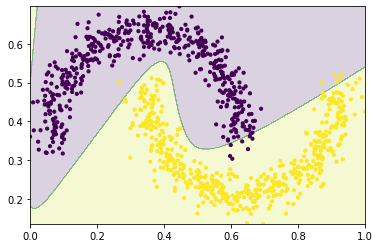

In [65]:
# Define region of interest by data limits
steps = 1000
x_span = np.linspace(X[0, :].min(), X[0, :].max(), steps)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())

Bu, sinir ağımızın verilerdeki kalıbı bulmaya ve ardından bunları uygun şekilde sınıflandırmaya çalışırken ne kadar becerikli olduğunu bilmemizi sağlar.

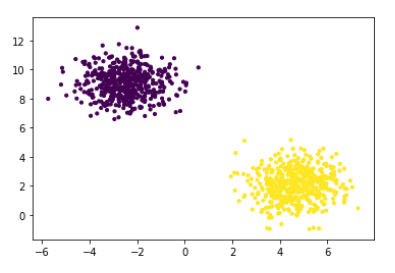